# Neural Networks (part 1)

## 1. Introduction 
Start by watching the following youtube video from 3blue1brown for a nice introduction in the concepts of neural networks (NN). The example that is used in the video is about handwriting digits classification. You will build a neural network that does exactly that.

The link to the video: https://www.youtube.com/watch?v=aircAruvnKk

Refer to the lecture notes on Canvas for the mathematical description of the network. In this notebook we will use the same names and conventions as used in the lecture notes.

## 2. Loading the data

In this notebook you will use a NN to classify the dataset `NNdata1.txt`. It contains the scores of $M$ students, their scores on two separte tests, and the label (0/1) wether they passed the course or not.

**Notebook aim:** Build a NN model to predict wether a student will pass or not based on the two inputs of the two test scores.

In [51]:
# importing the required modules
import numpy as np
import matplotlib.pyplot as plt

# to get matplot figures render correctly in the notebook use:
%matplotlib inline 

In [52]:
# load the data
FILENAME = './NNdata1.txt'
DELIMITER = ',' 

data = np.loadtxt(FILENAME, delimiter=DELIMITER)
print(data)

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]
 [61.10666454 96.51142588  1.        ]
 [75.02474557 46.55401354  1.        ]
 [76.0987867  87.42056972  1.        ]
 [84.43281996 43.53339331  1.        ]
 [95.86155507 38.22527806  0.        ]
 [75.01365839 30.60326323  0.        ]
 [82.30705337 76.4819633   1.        ]
 [69.36458876 97.71869196  1.        ]
 [39.53833914 76.03681085  0.        ]
 [53.97105215 89.20735014  1.        ]
 [69.07014406 52.74046973  1.        ]
 [67.94685548 46.67857411  0.        ]
 [70.66150955 92.92713789  1.        ]
 [76.97878373 47.57596365  1.        ]
 [67.37202755 42.83843832  0.        ]
 [89.67677575 65.79936593  1.        ]
 [50.53478829 48.85581153  0.        ]
 [34.21206098 44.2095286   0.        ]
 [77.92409145 68.97235999  1.        ]
 [62.27101367 69.95445795

## 3. Create the feature matrix X and labels matrix Y

The data that is fed into the NN constist of column vectors $\textbf x_i$ containing the features of the sample $i$. Because usually many samples are required to train and test the NN it is computationally not very efficient to pass them one-by-one. Therefore we have to write the code such that a whole batch of samples can be passed through the network simultaneously. To do so the data is organised in 2 matrices $\textbf X$ and $\textbf Y$
The feature matrix $\textbf X$ contains the features $\textbf x_i$ of the different samples as columns. If we have $m$ samples then $\textbf X \in \mathbb{R}^{n_0 \times m}$. $\color{red}\text{Note that this is different than used sofar!}$

For every sample $\textbf x_i$ a corresponding column vector $\textbf y_i$ exists that gives the category to which the sample belongs. The vector $\textbf y_i$ is a so-called one-hot-encoded label and has $n_L$ (the number of nodes in the output layer) elements. Since each output node of the NN corresponds to one of the possible categories to which a sample belongs, the element of the vector $\textbf y_i$ that corresponds to the category of the sample is equal to 1 and all other elements are zero. For example, if we have two categories '0' and '1' (as is the case in the current problem where the student is either rejected or accepted), and let's say we have 4 samples belonging to category 1, 0, 0, 1 respectively then $\textbf Y$ is given by:

$$ \textbf Y = \begin{bmatrix}
0 & 1 & 1 & 0\\ 
1 & 0 & 0 & 1
\end{bmatrix} $$

The matrix $\textbf Y$ contains the one-hot encoded labels $\textbf y_i$ of the samples as columns. If we have $m$ samples then $\textbf Y \in \mathbb{R}^{n_L \times m}$

In [53]:
#create feature matrix
X = data[:,:2]
print(X.shape)

#apply feature scaling to the matix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
X = scaler.fit_transform(X)
X=X.T
print(X)

#create one-hot encoded Y matrix
Y = data[:,2]
print(Y)
Y = np.eye(2)[Y.astype(int)]
Y=Y.T
print(Y)

(100, 2)
[[-1.60224763 -1.82625564 -1.53903969 -0.28210129  0.69152826 -1.06199728
  -0.23437234  0.4845113   0.53998666  0.97044832  1.56075461  0.48393864
   0.86065022  0.1921582  -1.34839922 -0.60293429  0.17694982  0.11893077
   0.25914553  0.58543944  0.0892403   1.2413042  -0.78042096 -1.62350714
   0.63426559 -0.17423248  0.75131151  1.41886056 -0.19700066 -1.38726847
  -0.22029098  1.02063763 -0.69916396 -0.70239602 -1.31231814 -0.56863523
  -1.63882482 -0.07578684  0.47234786 -1.62497511  0.94305124 -0.72810195
   1.48750373  0.86383711 -0.75392586 -0.17672918  0.59650575  1.65941042
  -0.1844568   1.33883167  0.73863826  1.73693492  1.28623744 -1.60736862
  -0.79324552 -0.82939191  1.65290418 -1.70794943  0.44442728  0.31776703
   0.50366692 -1.56803122 -0.48502704 -1.83802631 -1.08343328  0.04734442
  -1.30092096 -0.85594644  0.75592876  0.05694243 -1.70042734 -0.08289756
   0.34617678 -0.26788246 -0.35139858  1.76561835 -0.94934675 -0.78437891
  -0.26800277  0.8564979   1.

Next you need to split $X$ and $Y$ in a training set (data used to train the network) and a test set (data used to test the network). Normally you would also use a validation set to tune hyperparameters of the model/training but we leave that to part 2 of the NN notebook

In [54]:
# create a train and test dataset with size-ratio 9:1
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.1, random_state=42)
X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (2, 90)
X_test shape: (2, 10)
Y_train shape: (2, 90)
Y_test shape: (2, 10)


## 4. The Neural Network

The NN that you will make has the following layout:

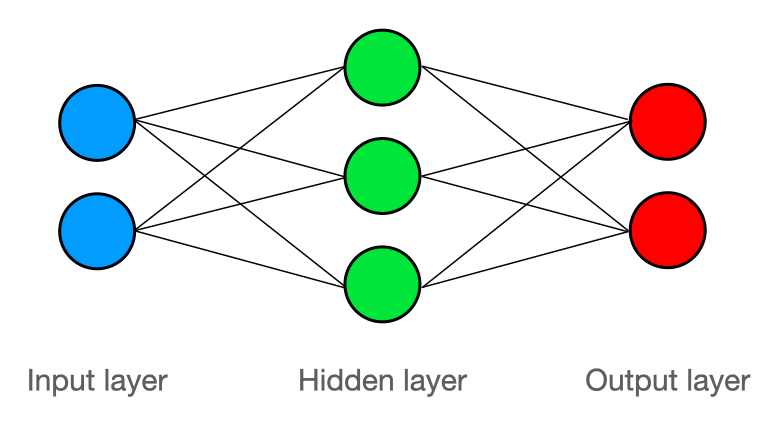

It consists of an input layer with two nodes because each sample consists of two features (score test 1 and score test 2). Then we have one hidden layer consisting of three nodes. Finally the output layer has two nodes corresponding to the two categories that need to be distinghuished.

The hidden layer has a **sigmoid** activation function while the outputlayer has a **softmax** activation function. 

### Define the activation functions

Below you define the required activation functions and their derivatives

In [ ]:
# define some activation functions

def sigmoid(z):
    """
    returns the sigmoid function of z

    Parameters
    ----------
    z : float or ndarray

    Returns
    -------
    out : same type and shape as z

    """
    z = np.float64(z)  
    return 1 / (1 + np.exp(-z))


def sigmoid_diff(z):
    """
    returns the derivative of the sigmoid function of z

    Parameters
    ----------
    z : float or ndarray

    Returns
    -------
    out : same type and shape as z

    """
    s = sigmoid(z)
    return s * (1-s)


def softmax(z):
    """
    returns the softmax function of z

    Parameters
    ----------
    z : 2D ndarray

    Returns
    -------
    out : same type and shape as z

    """
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0)


### Initalize the weights and biases
The layers are denoted with $l$. Our NN has an input layer ($l=0$), an output layer ($l=L=2$) and a hidden layer ($l=1$).

For each layer $l$ we have:
1. A number of nodes: $n_l$
2. A weight matrix: $\textbf W^{l} \in \mathbb{R}^{n_l \times n_{l-1}}$
3. A bias (column) vector: $\textbf b^{l} \in \mathbb{R}^{n_l \times 1}$

The input layer actually does not do much, it just passes the sample data to the output which then acts as input for the first hidden layer. So the input layer does not have a weight and bias.

The biases can be initialized with zeros; the weight's of layer $l$ are best intialized with random numbers from a normal distribution with mean 0 and standard deviation of $\sqrt{1/n_{l-1}}$. 

In [156]:
# intialize the neural network

# number of nodes in each layer
n0 = 2
n1 = 3
n2 = 2

# input layer
# no weights and biases

# hidden layer (l=1)
W1 = np.random.normal(scale=np.sqrt(1/n0), size=(n1,n0))
b1 = np.zeros((n1,1))

# output layer (l=2)
W2 = np.random.normal(scale=np.sqrt(1/n1), size=(n2,n1))
b2 = np.zeros((n2,1))

## 5. Train the NN

Firt you define three parameters that can be adjusted for optimal training.
- **learning_rate**: determines to what extend we update the weights and biases in the gradient descent step
- **no_epochs**: the number of times we pass the training data set through the network for training
- **batch_size**: how many samples we pass through the network before doing a gradient descent update

In [157]:
# train settings
learning_rate = 1
no_epochs = 1000
batch_size = 10

Below you implement the training of the network. A general layout (pseudocode) is already given. Note that we use the **Cross Entropy** (CE) loss function.

In [158]:
# perform the training
import sklearn
import time

ti = time.time()
loss = []
accuracy = []

for epoch in range(1, no_epochs + 1):
    X_train, Y_train = sklearn.utils.shuffle(X_train, Y_train)
    # for each epoch train over all batches
    for i in range(0, X_train.shape[1], batch_size):
        X_batch = X_train[:,i:i + batch_size]
        Y_batch = Y_train[:,i:i + batch_size]
        #print(Y_batch.shape)
        
        # forward pass
        # compute the output of the network for the batch
        '''YOUR CODE GOES HERE '''
        # print(b1.shape)
        z1 = np.dot(W1, X_batch) + b1
        a1 = sigmoid(z1)        
        z2 = np.dot(W2, a1) + b2
        a2 = softmax(z2)
        #print(z1)
        #print(np.dot(W1, X_batch))
        #print(b1)
        #print(a2)
        
        # backward pass
        # compute the derivatives dLdW and dLdb for the layers (use CE loss)
        '''YOUR CODE GOES HERE '''
        dLdz_2 = a2-Y_batch
        dLdz_1 = np.multiply(sigmoid_diff(z1), W2.T @ dLdz_2)
        #print(sigmoid_diff(z1).shape)
        dLdW_2 = dLdz_2 @ a1.T
        dLdW_1 = dLdz_1 @ X_batch.T
        #print(dLdz_1.shape, dLdW_1.shape)
        dLdb_2 = dLdz_2
        dLdb_1 = dLdz_1
        print("Mean gradient W1:", np.mean(dLdW_1), "Max gradient W1:", np.max(dLdW_1))
        
        # gradient descent step / update weights and biases
        '''YOUR CODE GOES HERE '''
        W1 = W1 - learning_rate/batch_size*dLdW_1
        W2 = W2 - learning_rate/batch_size*dLdW_2
        b1 = b1 - learning_rate/batch_size*np.sum(dLdb_1, axis=1, keepdims=True)
        b2 = b2 - learning_rate/batch_size*np.sum(dLdb_2, axis=1, keepdims=True)
    
    # for each epoch evaluate the network performance
    # compute accuracy of train set and store for later analysis
    output_train = softmax(np.dot(W2, sigmoid(np.dot(W1,X_train)+b1))+b2)
    #print(output_train.shape)
    Y_train_pred = np.eye(2)[np.argmax(output_train, axis=0)]
    Y_train_pred = Y_train_pred.T
    #print(Y_train_pred)
    accuracy.append(np.mean(Y_train_pred == Y_train))
    loss.append(-1/X_train.shape[1]*np.sum(np.multiply(Y_train, np.log(output_train))))
    
    # for each epoch print info on learning progress
    print(f"{round(epoch/no_epochs*100, 1)}%, ETA: {round(((time.time() - ti)*(no_epochs - epoch)/epoch), 1)} s")

print(loss)
print(accuracy)

Mean gradient W1: -0.11298249440030961 Max gradient W1: 0.020831099124980754
Mean gradient W1: -0.146836764777033 Max gradient W1: -0.006391621450404851
Mean gradient W1: -0.5871821146335764 Max gradient W1: -0.05212051660903144
Mean gradient W1: -0.11982057249441595 Max gradient W1: 0.18871568389630833
Mean gradient W1: -0.296954420529462 Max gradient W1: 0.1263450146563
Mean gradient W1: -0.21268470795265748 Max gradient W1: 0.5931989864717145
Mean gradient W1: -0.14329405639800977 Max gradient W1: 0.2666019975574947
Mean gradient W1: -0.24817284665929495 Max gradient W1: 0.6512428032208755
Mean gradient W1: -0.20238463636783555 Max gradient W1: 0.36328396177557987
0.1%, ETA: 3.1 s
Mean gradient W1: -0.07764425350837004 Max gradient W1: 0.19049453598616925
Mean gradient W1: -0.08796185371229466 Max gradient W1: 0.1548535607156147
Mean gradient W1: -0.4718908318564399 Max gradient W1: 0.263168612631252
Mean gradient W1: -0.06085771352227105 Max gradient W1: 0.48887155343881394
Mean gr

## 6. Analyze the result
To analyze the result compute the losses and the accuracy of the test set. Also make a plot of the training loss and training accuracy as function of the epoch.

In [ ]:
# compute the accuracy and losses of the test set
'''YOUR CODE GOES HERE '''


In [ ]:
# plot the loss and accuracy as function of the epoch number
'''YOUR CODE GOES HERE '''


Below you find some code to plot the data and the model prediction. 

In [ ]:
# visualize the results

# plot the model as a filled contour plot
# build mesh of gridpoints
x1_min, x1_max = X[0,:].min(), X[0,:].max()
x2_min, x2_max = X[1,:].min(), X[1,:].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

# compute hypothesis on the meshgrid 
# first create a 2xM ndarray with the values of the scores on the mesh 
X_mesh = np.vstack((xx1.ravel(), xx2.ravel()))

# compute the output of the network
a1 = sigmoid(W1 @ X_mesh + b1)
a2 = softmax(W2 @ a1 + b2)
h = a2[0] # select either one of the two features
h = h.reshape(xx1.shape)

# plot the contour level(s)
levels = [0.0, 0.5, 1.0]
plt.contourf(xx1, xx2, h, levels, alpha=0.3)

# plot the data
mask = Y[0] == 1
plt.scatter(*X[:2, mask], s=50, c='g', marker='o', label='OK')
plt.scatter(*X[:2,~mask], s=50, c='r', marker='o', label='failed')
plt.legend()
plt.xlabel('Normalized Score test 1')
plt.ylabel('Normalized Score test 2')